# Stocks vs Housing

## Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app.

This data set contains data from RMBCI and CONF from 12019

RMBI represents while conf reprsents

Understanding the relationship between the two can help real estate developers plan construction or investors predict market confidence.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. 

Our task is to combnine RMBI, CONF, and ((SP comp?)) to determine which(if any) is the leading 
statistic.

This data set is a simplified version of the real because it is daily.

Assuming an invesment based on X?


Dataset overview?

Cleaning


Data Sets
The data is contained in three files:

# Data Sets

The data is contained in three files(from 1980 up to 2019):

* RBCI.csv - Historical Housing Market Data - Real Building Cost Index (https://www.quandl.com/data/YALE/RBCI-Historical-Housing-Market-Data-Real-Building-Cost-Index)

* SMCI.csv - Stock Market Confidence Indices - United States Valuation Index Data - Individual (https://www.quandl.com/data/YALE/US_CONF_INDEX_VAL_INDIV-Stock-Market-Confidence-Indices-United-States-Valuation-Index-Data-Individual)


* COMP.csv - S&P Composite (https://www.quandl.com/data/YALE/SPCOMP-S-P-Composite)

Here is the schema and explanation of each variable in the files:

**RBCI.csv**
* Date (object) - Date
* Cost Index (float64) - type of offer ie BOGO, discount, informational
* U. S. Population in Millions (float64) - minimum required spend to complete an offer
* Long Rate (float64) - reward given for completing an offer


**SMCI.csv**
* Date (object) - age of the customer 
* Index Value (int) - date when customer created an app account
* Standard Error (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**COMP.csv**
* Year (object) - record description (ie transaction, offer received, offer viewed, etc.)
* S & P Composite

# Import Packages

In [2]:
#import holy grail of data science
import pandas as pd
import numpy as np

#more imports
import math
import json
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Imputer , MinMaxScaler
from sklearn.decomposition import PCA
from tqdm import tqdm


#matplot magic
%matplotlib inline


ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/Users/pierre/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

# Load Data

In [83]:
SMCI = pd.read_csv('data/SMCI.csv')

# 1.0 Exploratory Data Analysis

## 1.1 SMCI

In [84]:
SMCI

,Date,Index Value,Standard Error
0,2020-04-30,50.94,3.96
1,2020-03-31,47.92,4.16
2,2020-02-29,48.98,4.12
3,2020-01-31,47.02,4.06
4,2019-12-31,47.52,4.21
...,...,...,...
228,2000-04-30,27.68,4.23
229,1999-10-31,34.83,5.05
230,1999-04-30,31.61,3.73
231,1996-10-31,51.97,4.43


In [85]:
#get shape
SMCI.shape

(233, 3)

In [86]:
# data types
SMCI.dtypes

Date               object
Index Value       float64
Standard Error    float64
dtype: object

In [87]:
#quick stats
SMCI.describe()

,Index Value,Standard Error
count,233.000000,233.000000
mean,59.474764,3.640258
std,11.071294,0.568433
min,27.680000,2.320000
25%,49.490000,3.320000
50%,61.850000,3.640000
75%,67.830000,3.950000
max,81.820000,6.890000


In [88]:
SMCI.corr()

,Index Value,Standard Error
Index Value,1.000000,-0.294495
Standard Error,-0.294495,1.000000


In [89]:
#check for missing values if any
SMCI.isna().mean()

Date              0.0
Index Value       0.0
Standard Error    0.0
dtype: float64

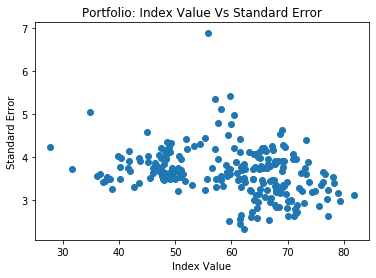

In [90]:
#plot reward vs difficulty
plt.scatter(SMCI['Index Value'], SMCI['Standard Error'])
plt.xlabel('Index Value')
plt.ylabel("Standard Error")
plt.title("Portfolio: Index Value Vs Standard Error")
plt.savefig("plots/iv_vs_se.png")
plt.show()

In [91]:
import plotly.graph_objects as go
import pandas as pd
import plotly_express as px
Index Value'
fig = px.line(SMCI, x='Date', y='Index Value', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

SyntaxError: invalid syntax (<ipython-input-91-c76cf7f1e46a>, line 4)

In [92]:
SMCI['Date'] = pd.to_datetime(SMCI.Date)


In [93]:
SMCI['Year Index']= SMCI.groupby(SMCI.Date.dt.year)['Index Value'].transform('mean')

In [94]:
SMCI['Year SE']= SMCI.groupby(SMCI.Date.dt.year)['Standard Error'].transform('mean')

In [95]:
SMCI.head()

,Date,Index Value,Standard Error,Year Index,Year SE
0,2020-04-30,50.94,3.96,48.715000,4.075000
1,2020-03-31,47.92,4.16,48.715000,4.075000
2,2020-02-29,48.98,4.12,48.715000,4.075000
3,2020-01-31,47.02,4.06,48.715000,4.075000
4,2019-12-31,47.52,4.21,49.171667,3.983333


In [96]:
SMCI['Date'] = pd.DatetimeIndex(SMCI['Date']).year


In [97]:
SMCI.head()

,Date,Index Value,Standard Error,Year Index,Year SE
0,2020,50.94,3.96,48.715000,4.075000
1,2020,47.92,4.16,48.715000,4.075000
2,2020,48.98,4.12,48.715000,4.075000
3,2020,47.02,4.06,48.715000,4.075000
4,2019,47.52,4.21,49.171667,3.983333


In [105]:
SMCI = SMCI.drop(['Index Value','Standard Error'], axis=1)

In [101]:
# dropping ALL duplicte values 
SMCI.drop_duplicates(subset ="Date", 
                     keep = "first", inplace = True) 
  

In [106]:
SMCI

,Date,Year Index,Year SE
0,2020,48.715000,4.075000
4,2019,49.171667,3.983333
16,2018,47.300000,3.821667
28,2017,39.737500,3.694167
40,2016,48.614167,3.777500
52,2015,48.345833,3.704167
64,2014,47.711667,3.677500
76,2013,58.480833,3.502500
88,2012,68.025000,3.123333
100,2011,66.208333,3.220833


In [109]:
SMCI.to_csv('data/SMCIclean.csv', index=False)